In [70]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

I loaded all the mnist data into training set and testing sets.

In [90]:
print('Shape:')
print('X_train:', str(X_train.shape))
print('Y_train:', str(y_train.shape))
print('X_test:', str(X_test.shape))
print('Y_test:', str(y_test.shape))

print('Unique label of images')
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# compute the number of labels
num_labels = len(unique)
print('Number of unique labels', num_labels)

Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)
Unique label of images
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
[ 980 1135 1032 1010  982  892  958 1028  974 1009]


This is to visualise what kind of data I'm dealing with. I printed the shape and all the unique labels in mnist there are.

In [73]:
def showImage(image_arr, index):
    first_image = np.array(image_arr[index], dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

Method to display the images at specific arrays.

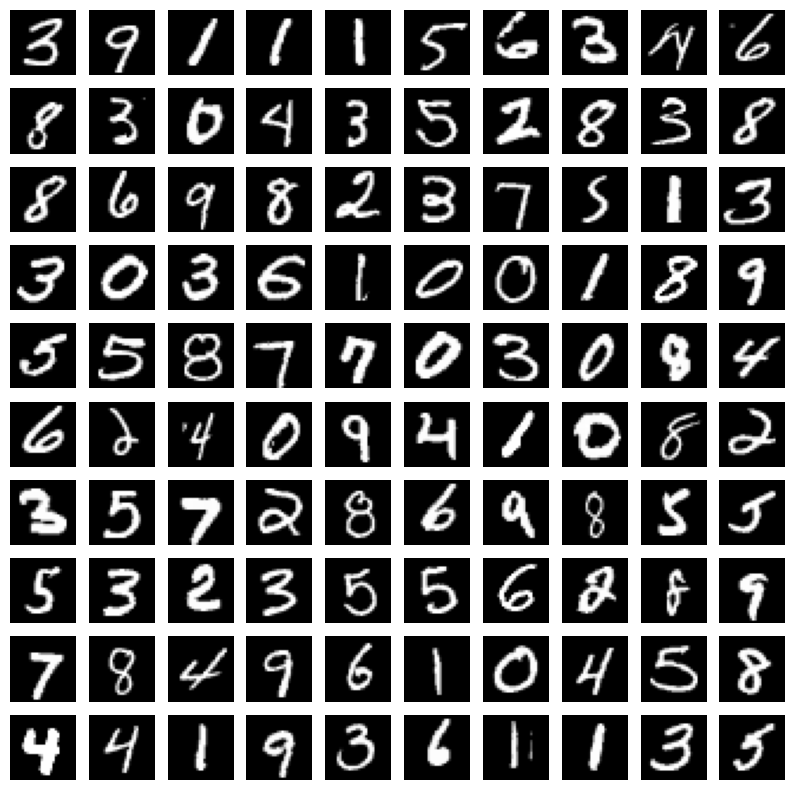

In [89]:
indexes = np.random.randint(0, X_train.shape[0], size=100)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(10, 10, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

I visualised 100 images from the training set. and plot them with matplotlib that has a 10x10 subgraph.

In [76]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [77]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [78]:
# resize and normalize
x_train = np.reshape(X_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(X_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [79]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [80]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('sigmoid'))
# model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('sigmoid'))
# model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.5773 - accuracy: 0.8392
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2249 - accuracy: 0.9331
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1668 - accuracy: 0.9512
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1304 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1040 - accuracy: 0.9696
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0850 - accuracy: 0.9744
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0694 - accuracy: 0.9786
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0466 - accuracy: 0.9863
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0392 - accura

In [84]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 6ms/step - loss: 0.0797 - accuracy: 0.9800

Test accuracy: 98.0%
